In [2]:
### TANG Kévin
import pandas as pd


In [48]:
!pip install --upgrade xlrd

     |████████████████████████████████| 96 kB 3.9 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [3]:
## question 1
df = pd.read_excel("Capital.xls")

# vérification du type de df
print(type(df))

# afficher les premières lignes du jeu de données
df.head()


<class 'pandas.core.frame.DataFrame'>


,X,Y,Z
0,Aix en provence,18.94,Sud-Est
1,Ajaccio,22.06,Sud-Est
2,Amiens,17.97,Nord
3,Angers,18.86,Ouest
4,Annecy,14.97,Sud-Est


In [4]:
# voir les graphiques dans le notebook
%matplotlib inline
# importation de librairie
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df.rename(columns={'X': 'ville', 'Y': 'taxe', 'Z': 'region'}, inplace=True)

df.head()

,ville,taxe,region
0,Aix en provence,18.94,Sud-Est
1,Ajaccio,22.06,Sud-Est
2,Amiens,17.97,Nord
3,Angers,18.86,Ouest
4,Annecy,14.97,Sud-Est


Nombre total de villes : 100


Text(0, 0.5, 'Pourcentage de villes')

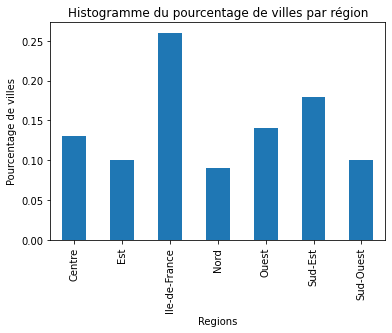

In [6]:
from re import T
from locale import normalize
############ Exercice 1 ###############################

##question 2
#Donner une représentation graphique en histogramme du pourcentage de villes par région

#nb total de villes
nb_total_ville = df.ville.count()
print("Nombre total de villes :", nb_total_ville)

df.groupby('region').size().transform(lambda x: x/nb_total_ville).plot.bar()

plt.title("Histogramme du pourcentage de villes par région")
plt.xlabel("Regions")
plt.ylabel("Pourcentage de villes")

Text(0.5, 1.0, 'Camembert du pourcentage de villes par région')

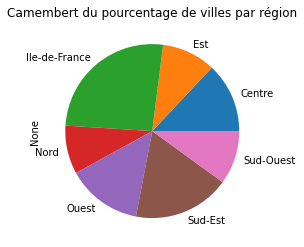

In [7]:
## question 3
#Représenter graphiquement et de différentes manières la répartition de chaque région pour 
#cet ensemble de données. Quelle est la région la plus représentée dans cette étude ?

df.groupby('region').size().transform(lambda x: x/sum(x)).plot.pie()

plt.title("Camembert du pourcentage de villes par région")

#Réponse : Ile-de-France

In [8]:
## question 4
#Calculer les différentes statistiques sur le taux de la taxe d’habitation. Regrouper ensuite ces 
#statistiques par région
print(df.taxe.describe())

df4 = df.groupby('region')
print(df4)

count    100.000000
mean      17.770700
std        5.529599
min        3.680000
25%       15.062500
50%       17.625000
75%       20.522500
max       36.170000
Name: taxe, dtype: float64


In [9]:
##question 5
#Quelle est la région la plus intéressante pour le taux de la taxe d’habitation ?
df.loc[ df.taxe == df.taxe.min() ]

#Réponse : Neuilly-Sur-Seine

,ville,taxe,region
64,Neuilly-sur-Seine,3.68,Ile-de-France


In [10]:
## question 6
# Quelle est la région la plus représentative de la moyenne nationale ?
taxe_mean = df.taxe.mean()
print(taxe_mean)

df.groupby('region')['taxe'].mean()

#Réponse : Est

17.7707


region
Centre           18.115385
Est              17.662000
Ile-de-France    11.764615
Nord             25.951111
Ouest            18.896429
Sud-Est          19.769444
Sud-Ouest        20.511000
Name: taxe, dtype: float64

In [11]:
## question 7
#  Donner en fonction du taux de la taxe d’habitation une typologie des villes françaises en 3 
#groupes.


In [ ]:
## question 8
#En utilisant une fonction Python, donner les villes qui ont un taux de taxe d’habitation situé 
#30% au dessus ou en dessous de la moyenne.
taxe_mean = df.taxe.mean()
taxe_mean_moins30 = taxe_mean * 0.7
taxe_mean_plus30 = taxe_mean * 1.3

print(taxe_mean)
print(taxe_mean_moins30)
print(taxe_mean_plus30)

df.loc[ df.taxe < taxe_mean_moins30 ]
df.loc[ df.taxe > taxe_mean_plus30 ]



17.7707
12.439490000000001
23.101910000000004


,ville,taxe,region
8,Arles,24.49,Sud-Est
21,Brest,25.99,Ouest
24,Calais,23.36,Nord
39,Dunkerque,28.69,Nord
45,La Seyne-sur-Mer,25.98,Sud-Est
49,Lille,36.17,Nord
66,Nimes,30.23,Sud-Ouest
78,Roubaix,27.97,Nord
91,Tourcoing,33.61,Nord
97,Villeneuve-d'Asq,29.96,Nord


In [ ]:
## question 9
#Idem pour les villes qui ont un taux de taxe d’habitation situé 20% au dessus ou en dessous de 
#la moyenne.
taxe_mean_moins20 = taxe_mean * 0.8
taxe_mean_plus20 = taxe_mean * 1.2

print(taxe_mean)
print(taxe_mean_moins20)
print(taxe_mean_plus20)

df.loc[ df.taxe < taxe_mean_moins20 ]
df.loc[ df.taxe > taxe_mean_plus20 ]


17.7707
14.216560000000001
21.324840000000002


,ville,taxe,region
1,Ajaccio,22.06,Sud-Est
8,Arles,24.49,Sud-Est
12,Avignon,22.41,Sud-Est
16,Béziers,22.14,Sud-Ouest
18,Bordeaux,22.11,Sud-Ouest
21,Brest,25.99,Ouest
24,Calais,23.36,Nord
39,Dunkerque,28.69,Nord
45,La Seyne-sur-Mer,25.98,Sud-Est
49,Lille,36.17,Nord


In [7]:
################## Exercice 2 ###########################

## question 1
pv = pd.read_table("poverty.txt", sep ='\t',  header =0)
pv.columns = ['Birth', 'Death', 'InfantDeath', 'Country', 'Continent']
print(pv)

    Birth  Death  InfantDeath            Country Continent
0    12.5   11.9         14.4           Bulgaria    Europe
1    13.4   11.7         11.3     Czechoslovakia    Europe
2    12.0   12.4          7.6  Former_E._Germany    Europe
3    11.6   13.4         14.8            Hungary    Europe
4    14.3   10.2         16.0             Poland    Europe
..    ...    ...          ...                ...       ...
91   52.2   15.6        103.0             Uganda    Africa
92   50.5   14.0        106.0           Tanzania    Africa
93   45.6   14.2         83.0              Zaire    Africa
94   51.1   13.7         80.0             Zambia    Africa
95   41.7   10.3         66.0           Zimbabwe    Africa

[96 rows x 5 columns]


In [9]:
def build_graph(pd,col1, col2):
  pd.plot.scatter(x=col1, y=col2)

Text(0.5, 1.0, 'Graphe InfantDeath en fonction de Death')

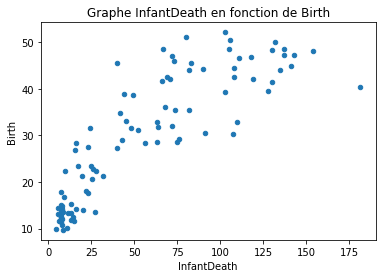

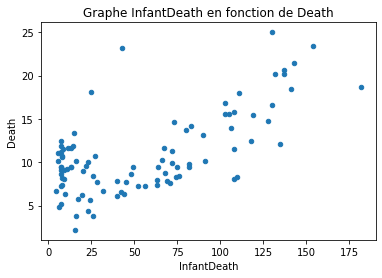

In [12]:
#Utiliser cette fonction pour faire le graphe de InfantDeath en fonction de Birth, 
#et celui de InfantDeath en fonction de Death
build_graph(pv, 'InfantDeath', 'Birth')
plt.title("Graphe InfantDeath en fonction de Birth")

build_graph(pv, 'InfantDeath', 'Death')
plt.title("Graphe InfantDeath en fonction de Death")

In [44]:
## question 2
def camembert (df, var1, var2):
  df.groupby([var1,var2]).size().plot.pie()

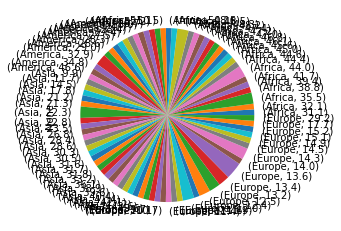

In [45]:
camembert(pv, pv.Continent, pv.Birth)

In [72]:
################################## Exercice 3 ##########################

sm = pd.read_table("student-mat.csv", sep =';')


In [12]:
## question 1
def correlation(var1, var2):
  pearsonr(var1, var2)

In [ ]:
## question 2

In [ ]:
## question 3